## HW2. Микросервисная архитектура

### Автор: *Кузнецов Кирилл Игоревич*
### Группа: М08-401НД
### Дата: 28.10.2025

Это задание выполняется в рамках модуля 2 «Микросервисная архитектура». Вы разработаете монолит, затем будете разделять его на микросервисы.

> Чтобы получить максимальный балл, убедитесь, что ваш ноутбук запускается с нуля, все шаги сопровождаются выводом на печать в ячейках, структура понятна, а в выводах вы объясняете свои решения.  

## Подготовка окружения (работал на локальной машине так что устанавливал под миникондой + поправил команды для исполнения под ZSH и макос)

In [ ]:
# %%capture
# !brew install graphviz
# !pip install docker-compose-diagram
# !pip install fastapi 'uvicorn[standard]' -qq
# !pip install --upgrade sqlalchemy

---
### Задание 1
Создание и запуск веб-сервера на FastAPI

Задачи:
1. Создайте [main.py](http://main.py) с минимальным FastAPI-приложением и запустите его (uvicorn main:app --reload).
2. Параллельно откройте мониторинг процессов (top/htop или ps -ef | grep uvicorn) и зафиксируйте, что сервер работает в одном процессе (или в одном рабочем процессе при dev-запуске).
3. Подайте 1–2 тестовых запроса к разным эндпойнтам (например, /users, /orders), чтобы показать, что все обслуживается одним приложением.
4. Сделайте вывод, является ли это приложение монолитом, опираясь на признаки: один процесс, общее приложение, все эндпойнты работают внутри одного сервера. Опишите результат текстом.

>  Вам нужно вспомнить, что в модуле 2 называют монолитным приложением.

%%html
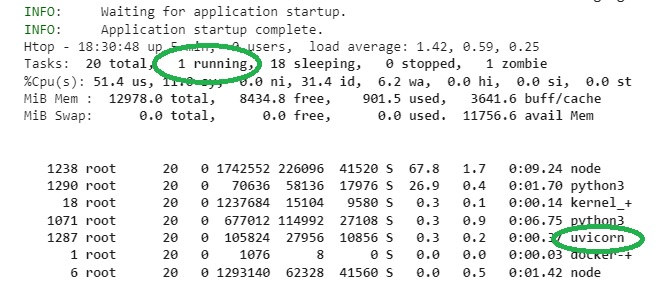

In [45]:
%%writefile main.py

import os
from fastapi import FastAPI
import subprocess
import time
import requests

app = FastAPI()

localdb = [{"name": "Ivan Ivanov", "email": "ivan@example.com"}]

@app.get("/")
def main_page():
    # Получим pid процесса на энжпоинте
    pid = os.getpid()
    print(f"Запрос / обработан процессом PID: {pid}")
    return {"status": "Server is running", 
            "local_entities": len(localdb), 
            "process_pid": pid}

@app.get("/info")
def info():
    # Аналогично
    pid = os.getpid()
    print(f"Запрос / обработан процессом PID: {pid}")
    return {**localdb[0], "process_pid": pid}

if __name__ == "__main__":
    # Запускаем сервер в фоне
    server_process = subprocess.Popen(["uvicorn", "main:app", "--reload", "--port", "8090", "--host", "0.0.0.0"])

    # Даем время на запуск
    time.sleep(5)
    
    
    # Демонстрация что процесс один
    print(f"\n--- Информация о процессе uvicorn (PID: {server_process.pid}) ---")
    subprocess.run(["ps", "-p", str(server_process.pid), "-o", "pid,ppid,pcpu,pmem,time,comm"])
    

    print(f"\n=== ДОКАЗАТЕЛЬСТВО ОДНОГО ПРОЦЕССА ===")
    print(f"PID основного процесса: {server_process.pid}")
    print("Список всех процессов uvicorn:")
    subprocess.run(["ps", "aux", "|", "grep", "uvicorn", "|", "grep", "-v", "grep"], shell=True)

    # Тестовые запросы
    print("\n=== ТЕСТОВЫЕ ЗАПРОСЫ ===")
    try:
        response1 = requests.get("http://localhost:8090/")
        print(f"GET / -> {response1.status_code}: {response1.json()}")
        
        response2 = requests.get("http://localhost:8090/info")
        print(f"GET /info -> {response2.status_code}: {response2.json()}")
    except Exception as e:
        print(f"Ошибка запроса: {e}")

    # Останавливаем сервер
    server_process.terminate()


Overwriting main.py


In [46]:
!python main.py

INFO:     Will watch for changes in these directories: ['/Users/nfox/Documents/my_docks/data_science/MIPT/3_semester/devops/hw_2']
INFO:     Uvicorn running on http://0.0.0.0:8090 (Press CTRL+C to quit)
INFO:     Started reloader process [15854] using WatchFiles
INFO:     Started server process [15856]
INFO:     Waiting for application startup.
INFO:     Application startup complete.

--- Информация о процессе uvicorn (PID: 15854) ---
  PID  PPID  %CPU %MEM      TIME COMM
15854 15853   0.0  0.3   0:00.08 /opt/homebrew/Caskroom/miniconda/base/envs/dev

=== ДОКАЗАТЕЛЬСТВО ОДНОГО ПРОЦЕССА ===
PID основного процесса: 15854
Список всех процессов uvicorn:
  PID TTY           TIME CMD
 8025 ttys003    0:02.55 /bin/zsh -il
 8066 ttys003    0:00.00 /bin/zsh -il
 8140 ttys003    0:00.00 /bin/zsh -il
 8141 ttys003    0:00.04 /bin/zsh -il
 8143 ttys003    0:00.41 /opt/homebrew/Cellar/powerlevel10k/1.20.0/share/powerl
 2706 ttys005    0:02.15 /bin/zsh -i
 3336 ttys005    0:00.00 /bin/zsh -i
 3339 t

In [47]:
""" 
Полученный вывод.

INFO:     Will watch for changes in these directories: ['/Users/nfox/Documents/my_docks/data_science/MIPT/3_semester/devops/hw_2']
INFO:     Uvicorn running on http://0.0.0.0:8090 (Press CTRL+C to quit)
INFO:     Started reloader process [15854] using WatchFiles
INFO:     Started server process [15856]
INFO:     Waiting for application startup.
INFO:     Application startup complete.

--- Информация о процессе uvicorn (PID: 15854) ---
  PID  PPID  %CPU %MEM      TIME COMM
15854 15853   0.0  0.3   0:00.08 /opt/homebrew/Caskroom/miniconda/base/envs/dev

=== ДОКАЗАТЕЛЬСТВО ОДНОГО ПРОЦЕССА ===
PID основного процесса: 15854
Список всех процессов uvicorn:
  PID TTY           TIME CMD
 8025 ttys003    0:02.55 /bin/zsh -il
 8066 ttys003    0:00.00 /bin/zsh -il
 8140 ttys003    0:00.00 /bin/zsh -il
 8141 ttys003    0:00.04 /bin/zsh -il
 8143 ttys003    0:00.41 /opt/homebrew/Cellar/powerlevel10k/1.20.0/share/powerl
 2706 ttys005    0:02.15 /bin/zsh -i
 3336 ttys005    0:00.00 /bin/zsh -i
 3339 ttys005    0:00.00 /bin/zsh -i
 3342 ttys005    0:00.07 /bin/zsh -i
 3344 ttys005    0:00.17 /opt/homebrew/Cellar/powerlevel10k/1.20.0/share/powerl
15853 ttys009    0:00.36 python main.py
15854 ttys009    0:00.08 /opt/homebrew/Caskroom/miniconda/base/envs/devops_env/
15855 ttys009    0:00.02 /opt/homebrew/Caskroom/miniconda/base/envs/devops_env/
15856 ttys009    0:00.24 /opt/homebrew/Caskroom/miniconda/base/envs/devops_env/

=== ТЕСТОВЫЕ ЗАПРОСЫ ===
Запрос / обработан процессом PID: 15856
INFO:     127.0.0.1:52498 - "GET / HTTP/1.1" 200 OK
GET / -> 200: {'status': 'Server is running', 'local_entities': 1, 'process_pid': 15856}
Запрос / обработан процессом PID: 15856
INFO:     127.0.0.1:52499 - "GET /info HTTP/1.1" 200 OK
GET /info -> 200: {'name': 'Ivan Ivanov', 'email': 'ivan@example.com', 'process_pid': 15856}

"""

' \nПолученный вывод.\n\nINFO:     Will watch for changes in these directories: [\'/Users/nfox/Documents/my_docks/data_science/MIPT/3_semester/devops/hw_2\']\nINFO:     Uvicorn running on http://0.0.0.0:8090 (Press CTRL+C to quit)\nINFO:     Started reloader process [15854] using WatchFiles\nINFO:     Started server process [15856]\nINFO:     Waiting for application startup.\nINFO:     Application startup complete.\n\n--- Информация о процессе uvicorn (PID: 15854) ---\n  PID  PPID  %CPU %MEM      TIME COMM\n15854 15853   0.0  0.3   0:00.08 /opt/homebrew/Caskroom/miniconda/base/envs/dev\n\n=== ДОКАЗАТЕЛЬСТВО ОДНОГО ПРОЦЕССА ===\nPID основного процесса: 15854\nСписок всех процессов uvicorn:\n  PID TTY           TIME CMD\n 8025 ttys003    0:02.55 /bin/zsh -il\n 8066 ttys003    0:00.00 /bin/zsh -il\n 8140 ttys003    0:00.00 /bin/zsh -il\n 8141 ttys003    0:00.04 /bin/zsh -il\n 8143 ttys003    0:00.41 /opt/homebrew/Cellar/powerlevel10k/1.20.0/share/powerl\n 2706 ttys005    0:02.15 /bin/zsh 

In [48]:
"""
Анализ процессов:

15853 - python main.py (родительский процесс)
15854 - reloader процесс (следит за изменениями файлов)
15855 - дополнительный процесс reloader'а
15856 - основной рабочий процесс (обрабатывает запросы)

Все запросы обрабатываются одним рабочим процессом (14162), что видно из логов:
127.0.0.1:52498 - "GET / HTTP/1.1" 200 OK
127.0.0.1:52499 - "GET /info HTTP/1.1" 200 OK

('process_pid': 15856, последовательная обработка в одном потоке логов, порты клиента последовательные)

ВЫВОД: Приложение является МОНОЛИТОМ
    
Несмотря на наличие нескольких процессов в dev-режиме (reloader), 
ключевые признаки монолитной архитектуры подтверждаются:

1. ОДИН РАБОЧИЙ ПРОЦЕСС - Все HTTP-запросы обрабатываются одним рабочим процессом
2. ОБЩЕЕ ПРИЛОЖЕНИЕ - Оба эндпойнта работают в рамках одного экземпляра FastAPI
3. СОВМЕСТНОЕ СОСТОЯНИЕ - Оба эндпойнта используют общую переменную localdb (БД)
4. ЕДИНАЯ ТОЧКА ВХОДА - Все запросы поступают на один сервер и порт

В продакшн-режиме (без --reload) будет только один процесс, 
что полностью соответствует определению монолита из модуля 2.

"""

'\nАнализ процессов:\n\n15853 - python main.py (родительский процесс)\n15854 - reloader процесс (следит за изменениями файлов)\n15855 - дополнительный процесс reloader\'а\n15856 - основной рабочий процесс (обрабатывает запросы)\n\nВсе запросы обрабатываются одним рабочим процессом (14162), что видно из логов:\n127.0.0.1:52498 - "GET / HTTP/1.1" 200 OK\n127.0.0.1:52499 - "GET /info HTTP/1.1" 200 OK\n\n(\'process_pid\': 15856, последовательная обработка в одном потоке логов, порты клиента последовательные)\n\nВЫВОД: Приложение является МОНОЛИТОМ\n\nНесмотря на наличие нескольких процессов в dev-режиме (reloader), \nключевые признаки монолитной архитектуры подтверждаются:\n\n1. ОДИН РАБОЧИЙ ПРОЦЕСС - Все HTTP-запросы обрабатываются одним рабочим процессом\n2. ОБЩЕЕ ПРИЛОЖЕНИЕ - Оба эндпойнта работают в рамках одного экземпляра FastAPI\n3. СОВМЕСТНОЕ СОСТОЯНИЕ - Оба эндпойнта используют общую переменную localdb (БД)\n4. ЕДИНАЯ ТОЧКА ВХОДА - Все запросы поступают на один сервер и порт\n\nВ 

___
### Задание 2

Есть монолитное веб-приложение (см. схему из конспекта). Четыре отдела генерируют нагрузку по 100 RPS каждый (суммарно ≈400 RPS), а текущая пропускная способность веб-сервера — ≈200 RPS; начинает ощущаться деградация. Для упрощения считаем, что сеть не узкое место, ресурсов RAM/CPU/HDD достаточно, техдолг низкий, финансовых ограничений нет.

Задача. Опишите в 5–8 предложениях ваш подход к декомпозиции монолита:
- Как вы диагностируете связность и выбираете границы сервисов (по доменам, бизнес-процессам или данным, допустим комбинированный вариант).
- Какие части вы вынесете первыми, чтобы снять узкое место по RPS, и почему.
- Как будете обеспечивать временную совместную работу старого и нового (этапный переход, strangler pattern).
- Кто владеет данными после разделения и как вы минимизируете риски согласованности.
- Нужен ли API-Gateway на входе и какие задачи он возьмет (маршрутизация, аутентификация, агрегация).

>  Вам нужно освежить раздел 4 «Что в монолите можно расделить на микросервисы»
 из модуля 2 и описать в 5—8 предложениях свой подход.

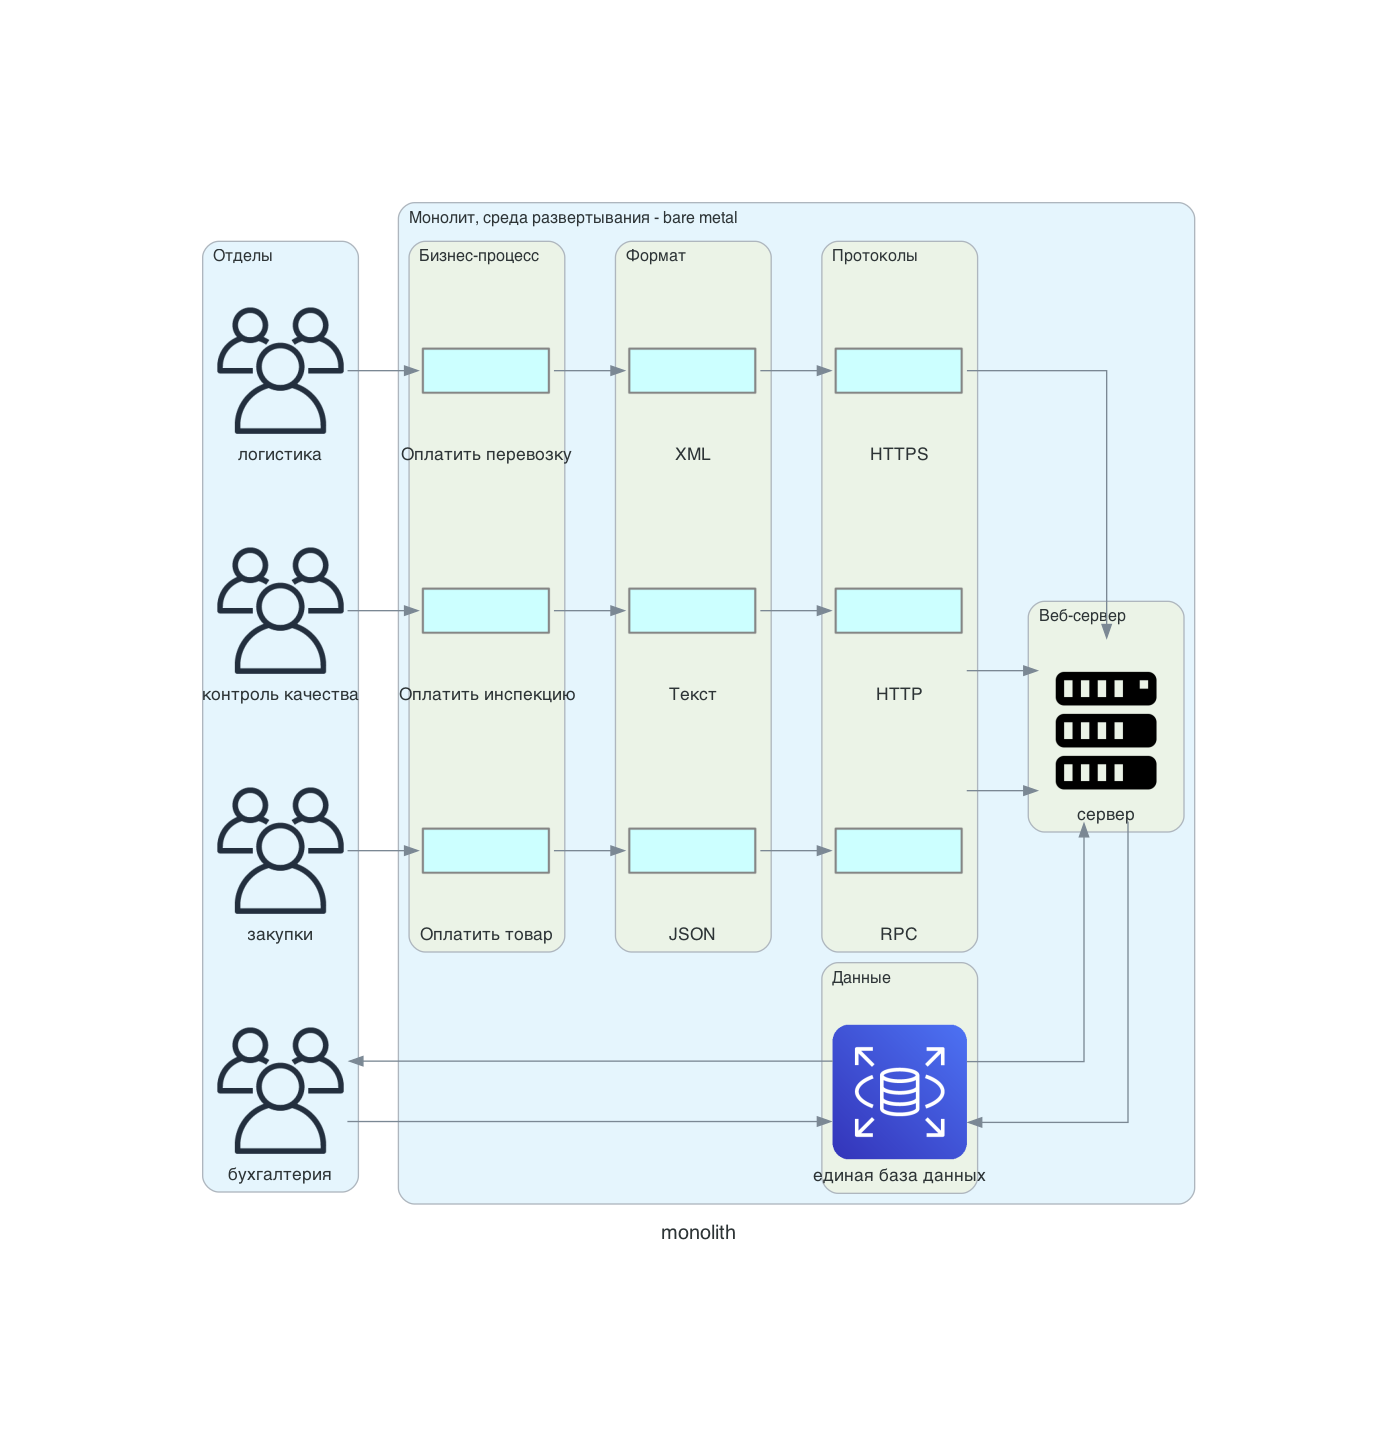

In [53]:
# Немного адаптируем под выполнение на локальной машине
from IPython.display import Image, display
import os

# Создаем директорию
os.makedirs('diagrams', exist_ok=True)

diagram_code = """
from diagrams import Cluster, Diagram
from diagrams.onprem.compute import Server
from diagrams.aws.database import RDS
from diagrams.programming.flowchart import Action
from diagrams.onprem.client import Users

with Diagram("monolith", show=False, filename="diagrams/monolith"):

    with Cluster("Отделы"):
        depts = [Users("логистика"),
                 Users("закупки"),
                 Users("контроль качества"),
                 Users("бухгалтерия")]

    with Cluster("Монолит, среда развертывания - bare metal"):
      with Cluster("Данные"):
        storage = [RDS("единая база данных")]

      with Cluster("Веб-сервер"):
        webserver = [Server("сервер")]

      with Cluster("Протоколы"):
        protocols = [Action("HTTPS"),
        Action("RPC"),
        Action("HTTP")]

      with Cluster("Формат"):
        formats = [Action("XML"),
        Action("JSON"),
        Action("Текст")]

      with Cluster("Бизнес-процесс"):
        process = [Action("Оплатить перевозку"),
        Action("Оплатить товар"),
        Action("Оплатить инспекцию")]

    storage[0] >> webserver[0]
    webserver[0] >> storage[0]
    storage[0] >> depts[3]
    depts[3] >> storage[0]

    depts[0] >> process[0] >> formats[0] >> protocols[0] >> webserver[0]
    depts[1] >> process[1] >> formats[1] >> protocols[1] >> webserver[0]
    depts[2] >> process[2] >> formats[2] >> protocols[2] >> webserver[0]
"""

with open("diagram.py", "w") as f:
    f.write(diagram_code)

# Проверяем установку необходимых пакетов
try:
    import diagrams
except ImportError:
    print("Установка пакета diagrams...")
    !pip install diagrams

# Запускаем генерацию диаграммы
!python diagram.py

# Показываем результат
image_path = 'diagrams/monolith.png'
if os.path.exists(image_path):
    display(Image(filename=image_path))
else:
    print("Диаграмма не была создана. Проверьте ошибки выше.")

In [54]:
"""
Вопрос:
- Как вы диагностируете связность и выбираете границы сервисов (по доменам, бизнес-процессам или данным, допустим комбинированный вариант).
Ответ:
Применю комбинированный подход, проанализировав и разделив на бизнес-домены (в нашем случае отделы), а так же порождаемые артефакты (типы файлов и их формат).

Вопрос:
- Какие части вы вынесете первыми, чтобы снять узкое место по RPS, и почему.
Ответ:
Первыми вынесу логистику и закупки они могут функционировать автономно. ОТК и бухгалтерия тесно связаны их развдение может быть затруднено, и на первом этапе 
не столь необходимо ведь мы уже снижаем нагрузку до допустимого уровня.

Вопрос:
- Как будете обеспечивать временную совместную работу старого и нового (этапный переход, strangler pattern).
Ответ:
Выберу поступательный подход в миграции (strangler pattern), так как это позволяет легко откатиться в случае провальной стратегии. Микросервис будет перехватывать 
запросы через API-Gateway который будет маршрутизировать запросы, оставляя остальную логику в монолите, в частности для блоков которых касаться не планируется 
на данном этапе.


Вопрос:
- Кто владеет данными после разделения и как вы минимизируете риски согласованности.
Ответ:
Владение данными, в области выделяемых доменов, передаётся новому сервису - для этого выполню миграцию соответствующих таблиц отделов логистики и закупок, используя 
CDC-подход (будем перехватывать логи записи в основную базу и на их основе создавать по сути обрезаный шард основной БД), это минимизирует риски несогласованности, 
потом удалим из основной БД дублирующий блок, что бы привести к нормализации.

Вопрос:
- Нужен ли API-Gateway на входе и какие задачи он возьмет (маршрутизация, аутентификация, агрегация).
Ответ:
API-Gateway нужен. Он будет осуществлять как маршрутизацию потоков запросов в новый блок микросервиса, аутентификацию и верификацию транзакций для согласованности, так 
и наполнение БД микросервиса.

"""

'\nВопрос:\n- Как вы диагностируете связность и выбираете границы сервисов (по доменам, бизнес-процессам или данным, допустим комбинированный вариант).\nОтвет:\nПрименю комбинированный подход, проанализировав и разделив на бизнес-домены (в нашем случае отделы), а так же порождаемые артефакты (типы файлов и их формат).\n\nВопрос:\n- Какие части вы вынесете первыми, чтобы снять узкое место по RPS, и почему.\nОтвет:\nПервыми вынесу логистику и закупки они могут функционировать автономно. ОТК и бухгалтерия тесно связаны их развдение может быть затруднено, и на первом этапе \nне столь необходимо ведь мы уже снижаем нагрузку до допустимого уровня.\n\nВопрос:\n- Как будете обеспечивать временную совместную работу старого и нового (этапный переход, strangler pattern).\nОтвет:\nВыберу поступательный подход в миграции (strangler pattern), так как это позволяет легко откатиться в случае провальной стратегии. Микросервис будет перехватывать \nзапросы через API-Gateway который будет маршрутизироват

___
### Задание 3


В исходном коде смешаны бизнес-логика и доступ к данным, из-за чего любое изменение приводит к «стрельбе из дробовика» — приходится править код во множестве мест. Наша цель — развести ответственность по слоям.   

Задачи:  

1. Скопируйте код из Задания 3 в новую часть ноутбука.  
2. Разделите проект на слои в духе DDD (рекомендуемая схема, но можно адаптировать под ваш код):
- domain/ — сущности, бизнес-правила (никаких импортов инфраструктуры);
- application/ — сценарии/сервисы приложения (координаторы действий, use-cases);
- infrastructure/ — хранилища, клиенты БД/HTTP, репозитории;
- api/ — HTTP-интерфейс (эндпоинты) или CLI.

Рекомендация: ≤5 слоев; больше — избыточно.

3. Разнесите файлы по слоям и оформите их отдельными ячейками в ноутбуке:

Вместо %%writefile main.py (который перезаписывает один файл) используйте понятные пути:
- %%writefile domain/models.py
- %%writefile application/services.py
- %%writefile infrastructure/repository_sqlalchemy.py
- %%writefile api/http.py
и т. п. Затем покажите «склейку» импортами в короткой ячейке запуска.

4. Опишите, как вы понимаете постепенную декомпозицию функционала через Strangler Fig и зачем нужны тесты при такой миграции (достаточно высокого уровня: риски параллельных версий, обратная совместимость, почему одних assert в рабочем коде недостаточно). Сошлитесь на раздел «Как?»/принципы декомпозиции из материалов модуля.  

Вопросы:
1) Объясните, как вы понимаете работу паттерна strangler fig по постепенной декомпозиции функционала?
2) В коде многократно используется команда assert. Как вы считаете, для чего следует писать юнит-тесты?
3) Гарантирует ли тестирование обратную совместимость функционала?

>  Вам нужно освежить раздел 4 «Как?» из модуля 2 и ответить в 5—8 предложениях

In [2]:
# Базовый код задания
import random
from fastapi import FastAPI
import uvicorn
from sqlalchemy import create_engine, text
from sqlalchemy.orm import sessionmaker

app = FastAPI()

localdb=[{"name": "Ivan Ivanov", "email": "ivan@example.com"}]  #<- была некая старая база данных
engine = create_engine("sqlite:///:memory:", echo=False)        #<- стала некая новая база данных
Session = sessionmaker(bind=engine)
session = Session()

with session.begin():  # Transaction starts here
    session.execute(text("""
        CREATE TABLE users (
            id INTEGER PRIMARY KEY,
            name VARCHAR(255) NOT NULL,
            email VARCHAR(255)
        );
    """))
    session.execute(
        text("INSERT INTO users (name, email) VALUES (:name, :email)"),
        {"name": "Ivan Ivanov", "email": "ivan@example.com"}
    )
    result = session.execute(text(f"SELECT id, name, email FROM users WHERE id=1"))
    for row in result.fetchall():
      print(f"ID: {row.id}, Name: {row.name}, Email: {row.email}")
    print("*"*80)


@app.get("/v1/info")
def old_system(request: str):
    """Существующая старая система."""
    return localdb[0]

@app.get("/v2/info")
def new_system(request: int):
    """Проектируемая новая система."""
    result = session.execute(text(f"SELECT id, name, email FROM users WHERE id={request}")).fetchone()
    return {"name":result.name, "email": result.email}

def strangler_fig(request, switchover_percentage):
    """
    паттерн "strangler_fig".

    Аргументы:
        request: Входные данные для обработки (было request: str -> стало request: int)
        switchover_percentage: Процент запросов, которые должны быть обработаны новой системой (0-100).
    """
    if random.randint(0, 100) < switchover_percentage:          # в реальности здесь более сложная проверка
        return new_system(int(request))
    else:
        return old_system(str(request))

if __name__ == "__main__":
    request_data = "1"
    current_percentage = 1                                      # Начинаем с 1% запросов, направляемых в новую систему

    result = strangler_fig(request_data, current_percentage)
    print(f"было : {result}")
    assert localdb[0] == result

    current_percentage = 70                                     # Постепенно увеличиваем процент
    result = strangler_fig(request_data, current_percentage)
    print(f"стало : {result}")
    assert localdb[0] == result

    current_percentage = 100                                    # В конечном итоге все запросы направляются в новую систему
    result = strangler_fig(request_data, current_percentage)
    print(f"стало : {result}")
    assert localdb[0] == result

ID: 1, Name: Ivan Ivanov, Email: ivan@example.com
********************************************************************************
было : {'name': 'Ivan Ivanov', 'email': 'ivan@example.com'}
стало : {'name': 'Ivan Ivanov', 'email': 'ivan@example.com'}
стало : {'name': 'Ivan Ivanov', 'email': 'ivan@example.com'}


In [77]:
import os

# Создаём структуру папок
os.makedirs("domain", exist_ok=True)
os.makedirs("application", exist_ok=True)
os.makedirs("infrastructure", exist_ok=True)
os.makedirs("api", exist_ok=True)

In [78]:
%%writefile domain/models.py

from dataclasses import dataclass

# Создаем модель данных для пользователя без зависимостей от инфраструктуры
@dataclass
class User:
    name: str
    email: str

Overwriting domain/models.py


In [79]:
%%writefile infrastructure/repository.py

from sqlalchemy import create_engine, text
from sqlalchemy.orm import sessionmaker
from domain.models import User

# Доступ к данным через SQLAlchemy
engine = create_engine("sqlite:///:memory:", echo=False)
SessionLocal = sessionmaker(bind=engine)

# Выносим все все взаииодействие с БД отдельно
def init_db():
    with SessionLocal() as session:
        # Немного подредактируем запрос по созданию и вставке что бы не допускать полные дубли
        session.execute(text("""
            CREATE TABLE IF NOT EXISTS users (
                id INTEGER PRIMARY KEY,
                name VARCHAR(255) NOT NULL,
                email VARCHAR(255),
                UNIQUE(name, email)
            );
        """))
        
        # Выполняем вставку
        session.execute(
            text("INSERT OR IGNORE INTO users (name, email) VALUES (:name, :email)"),
            {"name": "Ivan Ivanov", "email": "ivan@example.com"}
        )
        
        # Проверяем вставленные данные 
        result = session.execute(text("SELECT id, name, email FROM users"))
        for row in result:
            print(f"ID: {row.id}, Name: {row.name}, Email: {row.email}")
        
        print("*"*80)
        
        session.commit()

def get_user_by_id(user_id):
    with SessionLocal() as session:
        result = session.execute(
            text("SELECT name, email FROM users WHERE id = :id"),
            {"id": user_id}
        ).fetchone()
        if result:
            return User(name=result.name, email=result.email)
        raise ValueError("User not found")

Overwriting infrastructure/repository.py


In [80]:
%%writefile application/services.py

import random
from domain.models import User
from infrastructure.repository import get_user_by_id

# Старая "база" 
OLD_DB = [{"name": "Ivan Ivanov", "email": "ivan@example.com"}]

def old_system():
    data = OLD_DB[0]
    return User(name=data["name"], email=data["email"])

# Бизнес-логика и use-case 
def new_system(user_id):
    return get_user_by_id(user_id)

def strangler_fig(request_id, switchover_percentage):
    """
    Паттерн Strangler Fig: постепенный переход с old_system на new_system.
    """
    if random.randint(0, 100) < switchover_percentage:
        return new_system(int(request_id))
    else:
        return old_system()

Overwriting application/services.py


In [81]:
%%writefile api/http.py

# Выводим весь домен касающийся апи-взпимодействия только эндпоинты, никакой логики.
from fastapi import FastAPI
from application.services import old_system, new_system

app = FastAPI()

@app.get("/v1/info")
def old_system_endpoint():
    user = old_system()
    return {"name": user.name, "email": user.email}

@app.get("/v2/info")
def new_system_endpoint(user_id= 1):
    user = new_system(user_id)
    return {"name": user.name, "email": user.email}

Overwriting api/http.py


In [82]:
%%writefile main.py

# Инкапсуляция потока запусков в main.py 
from infrastructure.repository import init_db
from application.services import strangler_fig

if __name__ == "__main__":
    init_db()
    
    request_data = "1"
    for percentage in [1, 70, 100]:
        result = strangler_fig(request_data, percentage)
        expected = {"name": "Ivan Ivanov", "email": "ivan@example.com"}
        assert {"name": result.name, "email": result.email} == expected
        print(f"При {percentage}%: {result}")

Overwriting main.py


In [83]:
!python main.py

ID: 1, Name: Ivan Ivanov, Email: ivan@example.com
********************************************************************************
При 1%: User(name='Ivan Ivanov', email='ivan@example.com')
При 70%: User(name='Ivan Ivanov', email='ivan@example.com')
При 100%: User(name='Ivan Ivanov', email='ivan@example.com')


In [61]:
"""
Опишите, как вы понимаете постепенную декомпозицию функционала через Strangler Fig и зачем нужны тесты при такой миграции 
(достаточно высокого уровня: риски параллельных версий, обратная совместимость, почему одних assert в рабочем коде недостаточно). 
Сошлитесь на раздел «Как?»/принципы декомпозиции из материалов модуля.  

Вопросы:
1) Объясните, как вы понимаете работу паттерна strangler fig по постепенной декомпозиции функционала?
2) В коде многократно используется команда assert. Как вы считаете, для чего следует писать юнит-тесты?
3) Гарантирует ли тестирование обратную совместимость функционала?

Ответ (постарался комплексно):
Паттерн Strangler Fig предполагает постепенную замену старой системы новой реализацией: на начальном этапе большинство запросов 
обрабатывается старым кодом, но с ростом уверенности в новой логике трафик постепенно переключается на неё, обеспечивая реализацию 
парадокса коробля Тесея и бесшовный переход. Тесты нужны не только для проверки корректности, но и для обеспечения устойчивости и возможности
откатиться назад в случае необходимости. Ассерт-тесты обеспечивают защиту от внутренних ошибок, но не обеспечивают проверку внешнего поведения
между сервисами и контракты между ними - с чем могут помочб юнит-тесты.

Тестирование не гарантирует обратную совместимость функционала, но позволяет оценить стабильность в поведении от версии к версииэ.

"""

'\nОпишите, как вы понимаете постепенную декомпозицию функционала через Strangler Fig и зачем нужны тесты при такой миграции \n(достаточно высокого уровня: риски параллельных версий, обратная совместимость, почему одних assert в рабочем коде недостаточно). \nСошлитесь на раздел «Как?»/принципы декомпозиции из материалов модуля.  \n\nВопросы:\n1) Объясните, как вы понимаете работу паттерна strangler fig по постепенной декомпозиции функционала?\n2) В коде многократно используется команда assert. Как вы считаете, для чего следует писать юнит-тесты?\n3) Гарантирует ли тестирование обратную совместимость функционала?\n\nОтвет (постарался комплексно):\nПаттерн Strangler Fig предполагает постепенную замену старой системы новой реализацией: на начальном этапе большинство запросов \nобрабатывается старым кодом, но с ростом уверенности в новой логике трафик постепенно переключается на неё, обеспечивая реализацию \nпарадокса коробля Тесея и бесшовный переход. Тесты нужны не только для проверки ко

___
### Задание 4

При переходе от монолита к микросервисам часто используют паттерн Strangler Fig. Его идея в том, что старое приложение не выбрасывается сразу, а постепенно «обрастает» новыми сервисами. Сначала часть запросов обрабатывает новый код, а часть — старый монолит.

Код из Задания 3 рабочий, но неправильно спроектирован: в слой бизнес-логики попал код из слоя хранения данных.

Задачи:  
1. Скопируйте код из Задания 3 в новую ячейку.
2. Проведите рефакторинг кода, разделяя его по слоям в соответствии с концепцией DDD (отдельно domain, application, infrastructure).
3. Реализуйте паттерн Strangler Fig для реальных HTTP-запросов.

In [84]:
%%writefile infrastructure/repository.py

from sqlalchemy import create_engine, text
from sqlalchemy.orm import sessionmaker
from domain.models import User

# Доступ к данным через SQLAlchemy
engine = create_engine("sqlite:///./app.db", echo=False)
SessionLocal = sessionmaker(bind=engine)

# Старая ЬД
OLD_DB = [{"name": "Ivan Ivanov", "email": "ivan@example.com"}]

# Выносим все все взаииодействие с БД отдельно
def init_db():
    with SessionLocal() as session:
        # Немного подредактируем запрос по созданию и вставке что бы не допускать полные дубли
        session.execute(text("""
            CREATE TABLE IF NOT EXISTS users (
                id INTEGER PRIMARY KEY,
                name VARCHAR(255) NOT NULL,
                email VARCHAR(255),
                UNIQUE(name, email)
            );
        """))
        
        # Выполняем вставку
        session.execute(
            text("INSERT OR IGNORE INTO users (name, email) VALUES (:name, :email)"),
            {"name": "Ivan Ivanov", "email": "ivan@example.com"}
        )
        # Тут уже опустим проверку
        session.commit()
        


def get_user_by_id(user_id):
    with SessionLocal() as session:
        result = session.execute(
            text("SELECT name, email FROM users WHERE id = :id"),
            {"id": user_id}
        ).fetchone()
        if result:
            return User(name=result.name, email=result.email)
        raise ValueError("User not found")

Overwriting infrastructure/repository.py


In [85]:
%%writefile application/services.py

import random
import httpx
from domain.models import User
from infrastructure.repository import get_user_by_id

# URL старой системы 
LEGACY_URL = "http://127.0.0.1:8000/v1/info"

def old_system_http():
    """Выполняет реальный HTTP-запрос к старой системе."""
    response = httpx.get(LEGACY_URL)
    data = response.json()
    return User(name=data["name"], email=data["email"])

def new_system(user_id):
    return get_user_by_id(user_id)

def should_use_new_system(force_new=False, traffic_percentage=50):
    if force_new:
        return True
    return random.randint(0, 99) < traffic_percentage

Overwriting application/services.py


In [86]:
%%writefile api/http.py

from fastapi import FastAPI
from application.services import old_system_http, new_system, should_use_new_system
from infrastructure.repository import init_db 

app = FastAPI()

# Сформируем базовый эндпоинт
@app.get("/")
def root():
    return {"message": "Strangler Fig is running"}

# Вызываем init_db при старте приложения, выводя его из main()
@app.on_event("startup")
def startup_event():
    init_db()

# Старая система
@app.get("/v1/info")
def legacy_info():
    return {"name": "Ivan Ivanov", "email": "ivan@example.com"}

# Новая система
@app.get("/v2/info")
def strangler_fig_endpoint(user_id=1):
    if should_use_new_system(traffic_percentage=50):
        user = new_system(user_id)
    else:
        user = old_system_http()
    return {"name": user.name, "email": user.email}

Overwriting api/http.py


In [87]:
%%writefile main.py

import uvicorn
from infrastructure.repository import init_db

if __name__ == "__main__":
    uvicorn.run("api.http:app", host="127.0.0.1", port=8000)

Overwriting main.py


In [72]:
!python main.py

INFO:     Started server process [22914]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)
INFO:     127.0.0.1:51981 - "GET /v1/info HTTP/1.1" 200 OK
INFO:     127.0.0.1:51980 - "GET /v2/info HTTP/1.1" 200 OK
INFO:     127.0.0.1:51983 - "GET /v1/info HTTP/1.1" 200 OK
INFO:     127.0.0.1:51985 - "GET / HTTP/1.1" 200 OK
^C
INFO:     Finished server process [22914]
ERROR:    Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniconda/base/envs/devops_env/lib/python3.11/site-packages/uvicorn/_compat.py", line 23, in asyncio_run
    return runner.run(main)
           ^^^^^^^^^^^^^^^^
  File "/opt/homebrew/Caskroom/miniconda/base/envs/devops_env/lib/python3.11/asyncio/runners.py", line 118, in run
    return self._loop.run_until_complete(task)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "uvloop/loop.pyx", line 1512, in uvloop.loop.Loop.run_until_complete
  File

In [ ]:
"""
INFO:     Started server process [22914]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)
INFO:     127.0.0.1:51981 - "GET /v1/info HTTP/1.1" 200 OK
INFO:     127.0.0.1:51980 - "GET /v2/info HTTP/1.1" 200 OK
INFO:     127.0.0.1:51983 - "GET /v1/info HTTP/1.1" 200 OK
INFO:     127.0.0.1:51985 - "GET / HTTP/1.1" 200 OK

Далее логи ручного отключения....

"""

'\nINFO:     Started server process [18890]\nINFO:     Waiting for application startup.\nINFO:     Application startup complete.\nINFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)\nINFO:     127.0.0.1:51627 - "GET / HTTP/1.1" 200 OK\nINFO:     127.0.0.1:51632 - "GET /legacy/info HTTP/1.1" 200 OK\nINFO:     127.0.0.1:51631 - "GET /info HTTP/1.1" 200 OK\nINFO:     127.0.0.1:51634 - "GET /legacy/info HTTP/1.1" 200 OK\n\n'

> Как можно видеть и на версии 1 (легаси) и на версии 2 ответ 200!!!

___
### Задание 5

Задача: определите функцию (только def, без вызова), которая реализует паттерн Strangler Fig.

Требования:

1. функция должна обращаться как к новой системе, так и к старому монолиту по HTTP-запросам;
2. используйте requests.get (или, если умеете, современный асинхронный httpx).
3. код из Задания 3 работает на той же машине, что и веб-приложение — это неправильно. В новой версии предполагается, что API Gateway находится отдельно и делает HTTP-запросы.

In [ ]:
import random
import requests

def strangler_fig(request, switchover_percentage):
    """
    паттерн "strangler_fig".

    Аргументы:
        request: Входные данные для обработки (было request: str -> стало request: int)
        switchover_percentage: Процент запросов, которые должны быть обработаны новой системой (0-100).
    """
    
    OLD_SYSTEM_URL = "http://127.0.0.1:8000/v1/info"
    NEW_SYSTEM_URL = "http://172.0.0.1:8000/v2/info"

    if random.randint(0, 100) < switchover_percentage:
        # Запрос к новой системе
        response = requests.get(NEW_SYSTEM_URL, params={"request": int(request)})
    else:
        # Запрос к старой системе
        response = requests.get(OLD_SYSTEM_URL, params={"request": str(request)})
    
    response.raise_for_status()
    return response.json()

___
## Задание 6

Подготовьте ноутбук в логичной структуре: написание кода → запуск кода → текстовые ответы в ячейках """ ответ текстом """ в 5—8 предложениях→ итоги.

В итоговых выводах сформулируйте 5–8 предложений со своим опытом (от полной поддержки монолита до неприятия монолита, от полной поддержки микросервисов до категорического неприятия).

Вопросы, на которые надо ответить по итогу:
- Когда стоит использовать монолит?
- Когда стоит использовать микросервисы?
- Когда и как стоит использовать гибридный подход?


*Итоги:*
> Ни монолит, ни микросервисы не являются серебряной пулей. 

> Монолит хорошо подходит для MVP или же чувствительных к информации приложений (SAP например), но плохо масштабируется (точнее с некоторыми сложностями), плохо параллелится между командами. Микросервисы отлично подходят для сложных и планируемых под масштабирование проектов, но накладывает существенные расходы на сложность и поддержание, обеспечивая гибкость и возможность параллельной разработки. Гибридный подход - несет в своем ядре суть перехода от монолита к микросервисам и используется как поэтапный переход а не конечная остановка.

> Паттерн Strangler Fig позволяет постепенно выделять из монолита доменные подструктуры и выделять на их основе микросервисы, но в процессе выполнения задания я для себя оценил, что это не такая уж и тривиальная задача, ведь нужно по-сути поддерживать базы данных в синхроне и перехватывать запросы через шлюз, и что бы это все работало.

> Вообще выглядит так, что лучше сразу закладывать проект под микросервисную архитектуру (если это не mvp-демка или минисервис), чем потом мучаться.